In [24]:
#Load DATASET

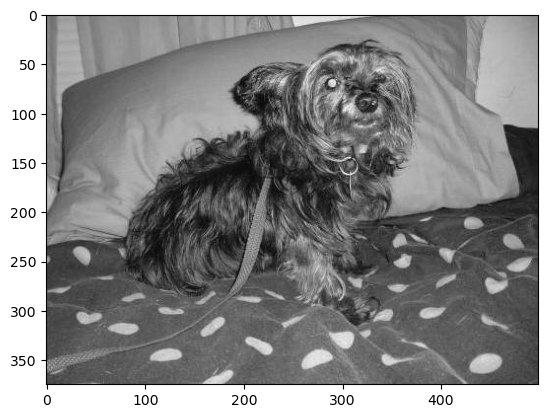

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "D:/Image Clustering/Image Cluster bw img"

CATEGORIES = ["DOG", "CAT"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array)
print(img_array.shape)

[[115 118 119 ... 132 132 132]
 [116 118 119 ... 134 134 134]
 [117 119 120 ... 136 136 136]
 ...
 [ 72  76  78 ...  80  79  78]
 [ 70  72  72 ...  72  72  73]
 [ 69  70  69 ...  71  71  71]]
(375, 499)


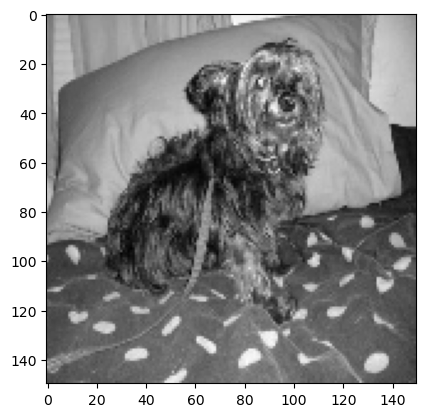

In [3]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [04:22<00:00, 47.69it/s]

25000


In [5]:
import random
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
0
1
1
0
1


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 82]
   [ 85]
   [ 87]
   ...
   [158]
   [167]
   [167]]

  [[ 85]
   [ 88]
   [ 88]
   ...
   [157]
   [160]
   [166]]

  [[ 88]
   [ 90]
   [ 85]
   ...
   [158]
   [159]
   [164]]

  ...

  [[183]
   [189]
   [197]
   ...
   [207]
   [202]
   [207]]

  [[181]
   [191]
   [194]
   ...
   [206]
   [200]
   [206]]

  [[179]
   [186]
   [191]
   ...
   [205]
   [199]
   [204]]]]


In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()